# ๏ Partie 2: Model Building

2 algorithmes avec au moins 2 paramètres différents (ex: max_depth, n_estimators,….)
Expliquer en vulgarisant le fonctionnement de vos algorithmes et ses paramètres

### Importer nos librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Importer notre dataset

In [72]:
df = pd.read_csv('./data/new_cancer.csv')
df.head()

,Unnamed: 0,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [73]:
# Drop Unnamed column
df = df.drop("Unnamed: 0",axis=1)
list(df.columns)

['Age',
 'Gender',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Weight Loss',
 'Shortness of Breath',
 'Wheezing',
 'Swallowing Difficulty',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Dry Cough',
 'Snoring',
 'Level']

## Choix de nos variables


In [74]:

# X = df[["Dust Allergy","OccuPational Hazards","Genetic Risk","Obesity","Coughing of Blood"]]
y = df[["Level"]]
X = df.drop('Level',axis=1)

### Split data

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)


### Étant donné que notre dataset ne contient que 1000 lignes je commence par tester le model LinearSVC
<img src="https://scikit-learn.org/stable/_static/ml_map.png">


## Créer notre model LinearSVC

In [76]:
from sklearn.svm import LinearSVC

In [77]:
# Instancier la class LinearSVC
clf = LinearSVC()

# Entrainer notre modéle
clf.fit(X_train, y_train)

/home/djila/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/djila/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [78]:
print("Score pour les données auquel le model est entrainer ",clf.score(X_train,y_train))
print("Score pour les données que le model n'a pas vu ",clf.score(X_test,y_test))

Score pour les données auquel le model est entrainer  0.99
Score pour les données que le model n'a pas vu  0.98


### On remarque ici que notre model à un excelent score de 97,5%
### Je vais donc faire de preprocessing à mon dataset pour voir si je peux amélioré le score 

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf_sc = make_pipeline(StandardScaler(),LinearSVC())
clf_sc.fit(X_train,y_train)
print("Score pour les données auquel le model est entrainer ",clf_sc.score(X_train,y_train))
print("Score pour les données que le model n'a pas vu ",clf_sc.score(X_test,y_test))

Score pour les données auquel le model est entrainer  1.0
Score pour les données que le model n'a pas vu  1.0


/home/djila/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### Après avoir fait le préprocessing avec StanderScaler j'obtiens un score de 100%, Excellente Résultats  

### Tester un autre model pour voir si nous obtiendrons un meilleur score
### Étant donné que mon dataset ne contient pas du text data Je vais tester le KNeighborsClassifier au lieu de Naive Bayes

In [137]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf_model = KNeighborsClassifier()
kn_clf_model.fit(X_train,y_train)
print("Le score de train set est de {} avec le KNeighborsClassifier model".format(kn_clf_model.score(X_train,y_train)))
print("Le score de Test set est de {} avec le KNeighborsClassifier model".format(kn_clf_model.score(X_test,y_test)))

/home/djila/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Le score de train set est de 0.99875 avec le KNeighborsClassifier model
Le score de Test set est de 0.995 avec le KNeighborsClassifier model


Le score de train set est de 0.99875 avec le KNeighborsClassifier model
Le score de Test set est de 0.995 avec le KNeighborsClassifier model
---------------------------------------n_neighbors= 6------------------------------------------

Le score de train set est de 0.99875 avec le KNeighborsClassifier model
Le score de Test set est de 0.995 avec le KNeighborsClassifier model
---------------------------------------n_neighbors= 7------------------------------------------

Le score de train set est de 0.99875 avec le KNeighborsClassifier model
Le score de Test set est de 1.0 avec le KNeighborsClassifier model
---------------------------------------n_neighbors= 8------------------------------------------

Le score de train set est de 0.99875 avec le KNeighborsClassifier model
Le score de Test set est de 1.0 avec le KNeighborsClassifier model
---------------------------------------n_neighbors= 9------------------------------------------

Le score de train set est de 0.99875 avec le KNeighb

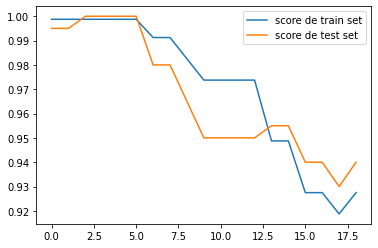

In [135]:
tab_score_train,tab_score_test = [],[]
for n in range(6,25):
    kn_clf = KNeighborsClassifier(n_neighbors=n)
    kn_clf.fit(X_train,y_train.values.ravel())
    score_train = kn_clf.score(X_train,y_train)
    score_test = kn_clf.score(X_test,y_test)
    print("Le score de train set est de {} avec le KNeighborsClassifier model".format(score_train))
    print("Le score de Test set est de {} avec le KNeighborsClassifier model".format(score_test))
    print("---------------------------------------n_neighbors= {}------------------------------------------\n".format(n))
    tab_score_train.append(score_train)
    tab_score_test.append(score_test)
    

plt.plot(tab_score_train,label= "score de train set")
plt.plot(tab_score_test,label="score de test set")
plt.legend()
plt.show()

#### Par defaut le nombre de voisin est de 5 et j'obtiens un score de 99% et si j'arrondi j'obtiens 100% je décide ensuite de jouer avec le nombre de voisin en faisant une boucle qui va de 6 à 25 pour tester l'efficacité de mon model. et je remarque meme si j'augmente le nombre de voisin à 24 j'obtiens un score de 94% comme le montre ce joli graph 

In [134]:
kn_sc = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=10))
kn_sc.fit(X_train,y_train.values.ravel())
print("Score pour les données auquel le model est entrainer ",kn_sc.score(X_train,y_train))
print("Score pour les données que le model n'a pas vu ",kn_sc.score(X_test,y_test))

Score pour les données auquel le model est entrainer  1.0
Score pour les données que le model n'a pas vu  1.0


### c'est impréssionnant j'obtients un score de 100% on scalant mes données 

#### je fais ensuite une cross validation pour entrainer et valider mon model sur 5 parties c'est à dire de découper mon dataset en 5 partie en précisant le nombre de splite cv = 5

In [136]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(KNeighborsClassifier(),X_train,y_train.values.ravel(),cv=5)#.values.ravel() pour eviter les warrning
cvs

array([0.96875, 0.96875, 1.     , 1.     , 0.99375])

#### la cross validation me return un tableau avec 5 score c'est à dire pour chaque score on entraine le model avec 4 partie de notre dataset et on test avec la 5éme partie 

In [123]:
# le score moyen de la cross validation
print("Le score moyen de la cross validation est de :",cvs.mean())

Le score moyen de la cross validation est de : 98.625


ensuite pour tester les autres **hyper paramettres** comme le type de distance **Euclidean, manhattan ou minkowski** en changant **le nombre de voisin n_neighbors** pour obtenir une meilleur performance et éviter une **Over fitting**  j'utilise **GridSearchCV** 

In [166]:
from sklearn.model_selection import GridSearchCV
#j'utilise un dictionnaire contenant les parametres
#nombre de voisin à tester de 1 à 25
#distance euclidean ou manhattan
params = {"n_neighbors": np.arange(5,25),
        "metric":["euclidean","manhattan","minkowski"]}
gscv = GridSearchCV(KNeighborsClassifier(),params,cv=5)
gscv.fit(X_train,y_train.values.ravel())


print('Le model qui a fait le meilleur score ',gscv.best_score_)
print("Les meilleurs paramettres qui ont fait que ce model est le meilleur sont : ",gscv.best_params_)

Le model qui a fait le meilleur score  0.99375
Les meilleurs paramettres qui ont fait que ce model est le meilleur sont :  {'metric': 'manhattan', 'n_neighbors': 5}


#### j'affiche ensuite le meilleur score grace à best_score et j'obtiens 99%
#### j'affiche aussi les meilleurs paramettres de ce model avec best param, et je vois que la meilleurs metric pour mon model est celle de manhattan

In [167]:
# afficher le score pour les données de test
clf = gscv.best_estimator_
print("Le score est de {}% pour le Test set ".format(clf.score(X_test,y_test) * 100))

Le score est de 100.0% pour le Test set 


[[63  0  0]
 [ 0 68  0]
 [ 0  0 69]]


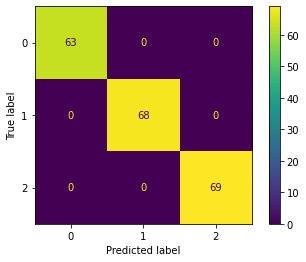

In [169]:
#afficher la confusion metric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test,clf.predict(X_test)))

plot_confusion_matrix(clf, X_test, y_test,)

### Dans cette matrix je vois que parmi les 63 patients qui ont un cancer Low mon model a prédit correctement et sans erreure 
### Ensuite parmi les 68 patients qui ont un cancer medium de mon test set, le model les a prédit avec 100% de précision dans leur class Medium
### Enfin parmi les 69 patients qui ont un cancer high ont été bien prédites avec mon model

## mon modéle est  précis à 100% il a prdit sans erreure le  niveau de cancer chez les 200 patients qu'il n'a jamais vu (auquel il ne s'est pas entrainé "données de test")